In [38]:
# libraries required
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [39]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [16,10]

### Reading and storing data to dataset from raw file

In [40]:
# read the first two lines, use that to replace the other such instances in the file
# then go onto reading the file

# Read in the file
with open('oxygen.xyz', 'r') as file :
  filedata = file.read()


# reading the first two lines to get knowledege about the atoms present

lines = filedata.split('\n')
numMol = int(lines[0])
str_to_rep = lines[0] + '\n' + lines[1] + '\n'

# Replace the target string

filedata = filedata.replace(str_to_rep, '')

# Write the file out again
with open('oxygen_edited.xyz', 'w') as file:
  file.write(filedata)

In [41]:
str_to_rep

'1981\n generated by VMD\n'

In [45]:
def readXYZ(filename):
  db = pd.read_table(filename, skiprows=0, delim_whitespace=True,
                         names=['atom', 'X', 'Y', 'Z'], 
                         engine='python', skip_blank_lines=True)
  
  return db

In [46]:
coordDB = readXYZ('oxygen_edited.xyz')

In [47]:
coordDB

,atom,X,Y,Z
0,OH2,-24.687395,-12.030952,-6.522173
1,OH2,-12.533985,-14.053472,-4.207694
2,OH2,-22.731306,-9.749650,14.742654
3,OH2,-14.428695,-9.455146,9.125836
4,OH2,-12.972419,-0.349752,-9.317892
...,...,...,...,...
237715,OH2,-89.956352,-50.062740,42.262691
237716,OH2,-71.514282,-127.636093,-58.626583
237717,OH2,12.045074,75.228447,11.166415
237718,OH2,-166.542694,-1.113765,118.448631


In [48]:
coordDB.describe()

,X,Y,Z
count,237720.000000,237720.000000,237720.000000
mean,-5.491168,-2.933642,-3.757246
std,56.610129,57.790399,56.929225
min,-289.973633,-270.009094,-243.054306
25%,-39.202112,-35.233238,-37.436312
50%,-4.543016,-1.321144,-3.364724
75%,28.590902,31.758643,29.721677
max,229.703796,286.061249,287.692871


In [49]:
# checking if there any NaNs - basically checking if the file has been read correctly
# if True then incorrectly read
coordDB.isnull().values.any()

False

In [50]:
def getFirstMoleculeData(db, num_mol):
  totalRows = len(db)

  coordX = []
  coordY = []
  coordZ = []
  disp_R = []
  
  for i in range(0, totalRows, num_mol):
    coordX.append(db.iloc[i][1])
    coordY.append(db.iloc[i][2])
    coordZ.append(db.iloc[i][3])
    r = math.sqrt( (db.iloc[i][3])**2 + (db.iloc[i][2])**2 + (db.iloc[i][1])**2 )
    disp_R.append(r)

  diff = np.diff(disp_R, append = disp_R[0]) #this calculates r(t + dt) - r(t)
  diff_sq = diff**2
  

  df_final = pd.DataFrame(data = {'X': coordX, 'Y': coordY, 'Z': coordZ, 'R': disp_R, 'SquareDiff':diff_sq})

  return df_final

In [51]:
def getMSD(db):
  msd_data = []

  for iterone in range(len(db)):
    sum = 0.0
    for itertwo in range(iterone):
      sum = sum + db['SquareDiff'][itertwo]
    
    msd_data.append(sum)
  
  db_final = db
  db_final['MSD'] = msd_data

  return db_final

In [52]:
mol1data = getFirstMoleculeData(coordDB, num_mol = numMol)

In [53]:
mol1data_final = getMSD(mol1data)

In [54]:
mol1data_final

,X,Y,Z,R,SquareDiff,MSD
0,-24.687395,-12.030952,-6.522173,28.226761,89.310967,0.000000
1,-35.452183,-10.134257,-7.746716,37.677209,29.317717,89.310967
2,-38.196766,-12.390274,-15.633002,43.091792,9.052141,118.628684
3,-32.178204,-20.665621,-12.006306,40.083115,9.392260,127.680826
4,-38.525185,-17.049124,-9.320388,43.147794,33.143412,137.073086
...,...,...,...,...,...,...
115,-80.893661,-80.865448,105.555443,155.643685,17.328189,6277.960712
116,-80.425537,-73.902641,116.654266,159.806399,14.926991,6295.288901
117,-93.255768,-73.614220,112.570686,163.669945,4.995714,6310.215892
118,-91.936798,-74.101982,110.080551,161.434836,2.888753,6315.211606


### Plotting X, Y, Z coordinates, sqaure difference and MSD at every timestep

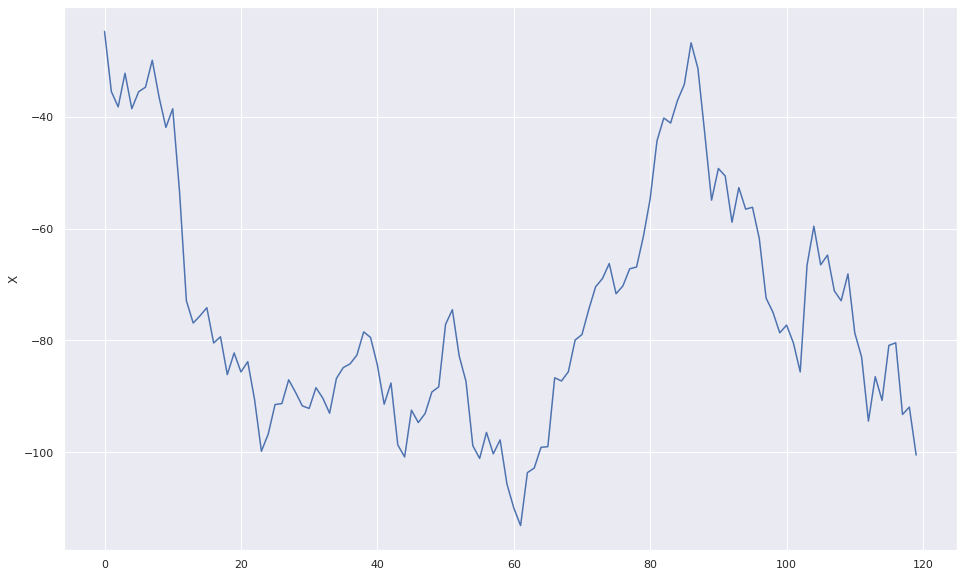

In [55]:
sns.lineplot(y = 'X', x = list(range(len(mol1data))), data=mol1data)

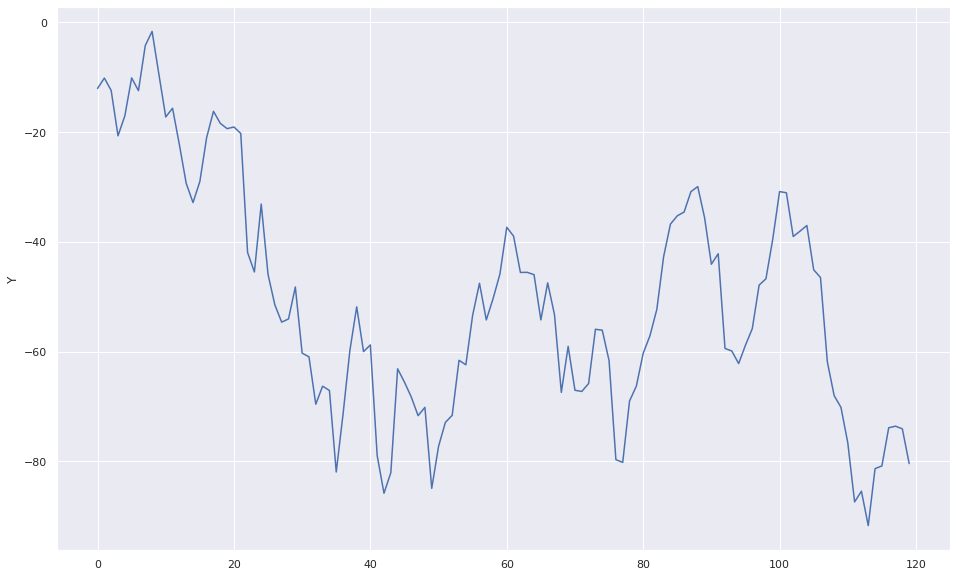

In [56]:
sns.lineplot(y = 'Y', x = list(range(len(mol1data))), data=mol1data)

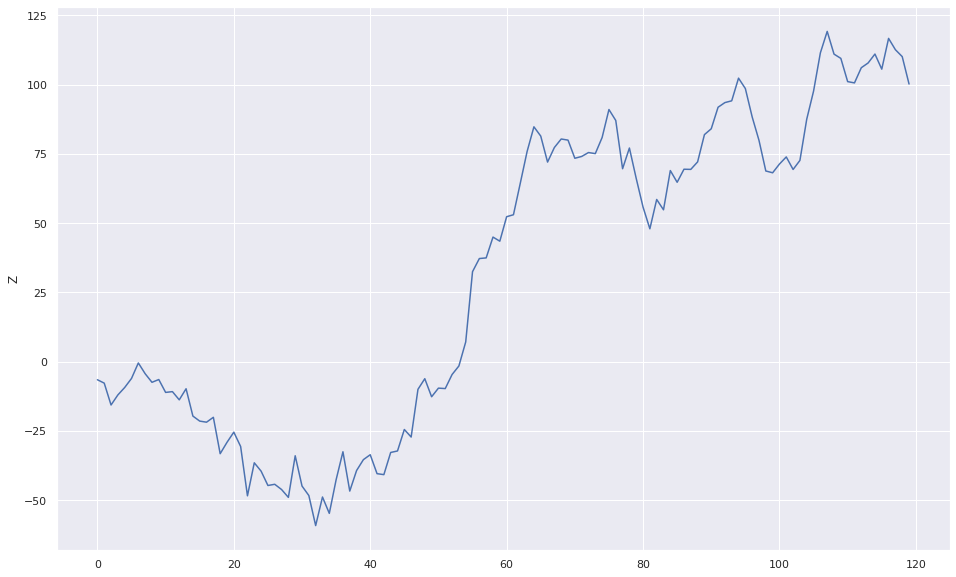

In [57]:
sns.lineplot(y = 'Z', x = list(range(len(mol1data))), data=mol1data)

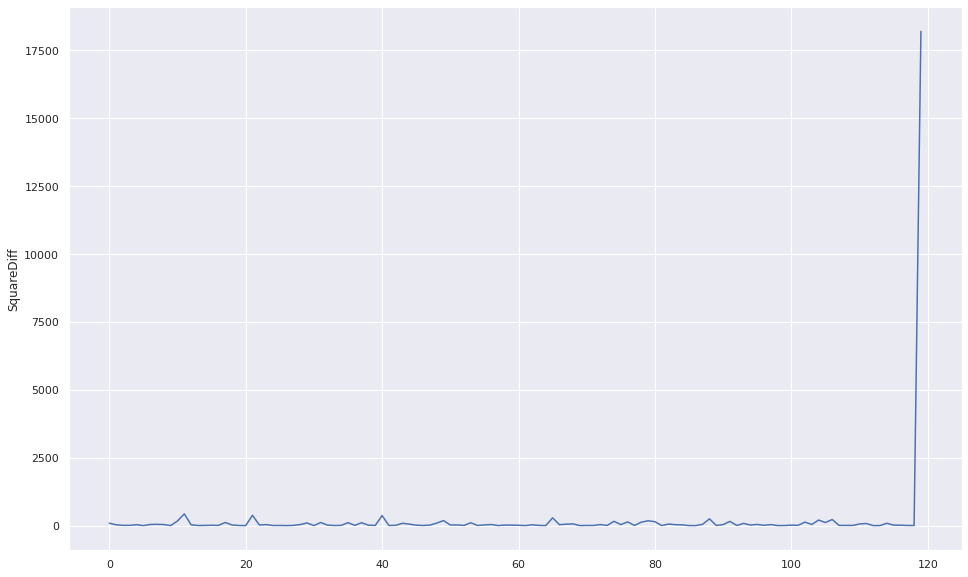

In [58]:
sns.lineplot(y = 'SquareDiff', x = list(range(len(mol1data))), data=mol1data)

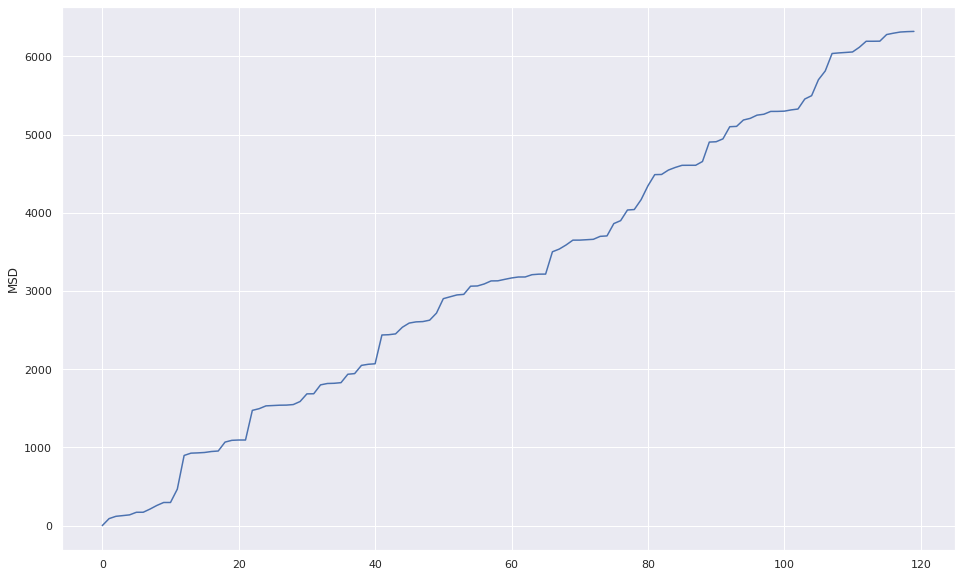

In [59]:
sns.lineplot(y = 'MSD', x = list(range(len(mol1data))), data=mol1data_final)

### Analysis

In [60]:
def getAMoleculeData(db, num_mol, idx):
  print('Processing the data of molecule: ', idx)
  totalRows = len(db)

  coordX = []
  coordY = []
  coordZ = []
  disp_R = []
  
  for i in range(idx, totalRows, num_mol):
    # print(i)
    coordX.append(db.iloc[i][1])
    coordY.append(db.iloc[i][2])
    coordZ.append(db.iloc[i][3])
    r = math.sqrt( (db.iloc[i][3])**2 + (db.iloc[i][2])**2 + (db.iloc[i][1])**2 )
    disp_R.append(r)

  diff = np.diff(disp_R, append = disp_R[0]) #this calculates r(t + dt) - r(t)
  diff_sq = diff**2

  df_final = pd.DataFrame(data = {'X': coordX, 'Y': coordY, 'Z': coordZ, 'R': disp_R, 'SquareDiff':diff_sq})

  return df_final

In [61]:
mol6data = getAMoleculeData(coordDB, numMol, 7)

Processing the data of molecule:  7


In [62]:
mol6data

,X,Y,Z,R,SquareDiff
0,-11.729742,-7.589006,4.126406,14.567329,16.035164
1,2.787568,4.666882,9.056782,10.562936,284.682858
2,1.228845,-3.235179,27.216343,27.435484,22.597016
3,10.376084,-8.093886,18.474098,22.681852,123.075634
4,20.464640,-24.233358,11.608074,33.775798,112.081719
...,...,...,...,...,...
115,-64.420364,59.246258,37.426888,95.188625,56.088137
116,-65.267365,48.780529,32.431774,87.699424,6.867206
117,-73.192886,34.327412,40.275616,90.319959,54.290434
118,-63.212158,42.446575,32.916637,82.951755,150.521576


In [63]:
def getMSDAllMols(db, num_mol):
  msd_list_mols = []
  
  for i in range(0, num_mol):
    tempdf = (getAMoleculeData(db, num_mol, i))
    finaldf = getMSD(tempdf)
    msd_list_mols.append(finaldf['MSD'])

  return msd_list_mols

In [64]:
# contains the coordinate data of all the molecules 
msddatalist = getMSDAllMols(coordDB, numMol)

Processing the data of molecule:  0
Processing the data of molecule:  1
Processing the data of molecule:  2
Processing the data of molecule:  3
Processing the data of molecule:  4
Processing the data of molecule:  5
Processing the data of molecule:  6
Processing the data of molecule:  7
Processing the data of molecule:  8
Processing the data of molecule:  9
Processing the data of molecule:  10
Processing the data of molecule:  11
Processing the data of molecule:  12
Processing the data of molecule:  13
Processing the data of molecule:  14
Processing the data of molecule:  15
Processing the data of molecule:  16
Processing the data of molecule:  17
Processing the data of molecule:  18
Processing the data of molecule:  19
Processing the data of molecule:  20
Processing the data of molecule:  21
Processing the data of molecule:  22
Processing the data of molecule:  23
Processing the data of molecule:  24
Processing the data of molecule:  25
Processing the data of molecule:  26
Processing 

In [74]:
globalMSDdata = []
for counterone in range(120):
  globalsum = 0
  for countertwo in range(len(msddatalist) - 1):
    # print('in ', countertwo)
    globalsum = globalsum + msddatalist[countertwo][counterone]
  
  globalsum = globalsum/(len(msddatalist))
  globalMSDdata.append(globalsum)

In [76]:
df_msd = pd.DataFrame(data = {'GlobalMSD': globalMSDdata})

In [77]:
time = list(range(len(df_msd)))
time_final = [float(i*0.05) for i in time]

In [78]:
df_msd['time'] = time_final

In [79]:
df_msd

,GlobalMSD,time
0,0.000000,0.00
1,59.062667,0.05
2,116.471031,0.10
3,172.512674,0.15
4,224.931872,0.20
...,...,...
115,6114.975625,5.75
116,6164.216625,5.80
117,6216.058942,5.85
118,6266.120550,5.90


In [80]:
df_msd.to_csv('GlobalMSDdata.csv')

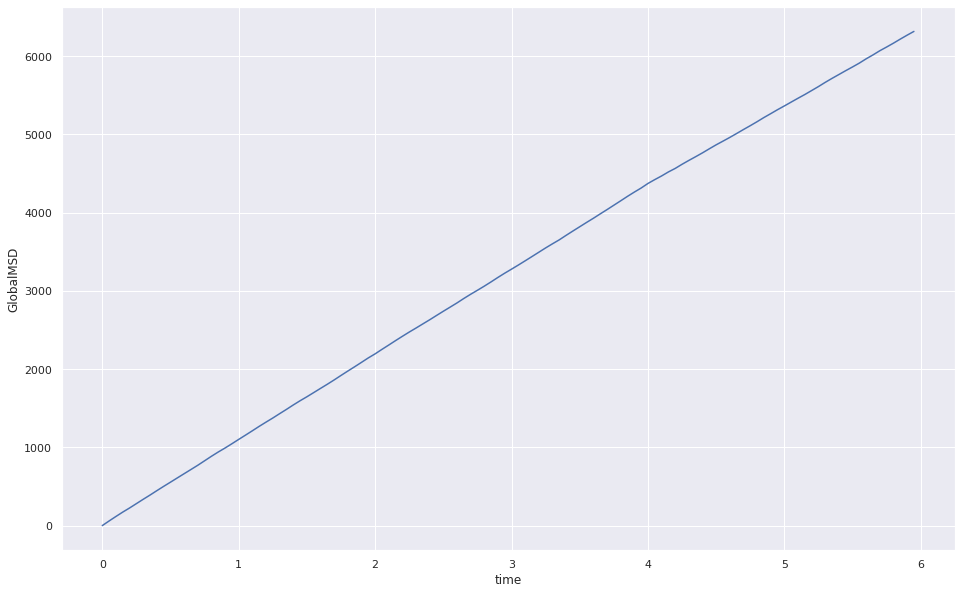

In [81]:
sns.lineplot(y = 'GlobalMSD', x = 'time', data=df_msd)

### Line of best fit

In [86]:
df = pd.read_csv('GlobalMSDdata.csv', index_col = 0)

In [87]:
df

,GlobalMSD,time
0,0.000000,0.00
1,59.062667,0.05
2,116.471031,0.10
3,172.512674,0.15
4,224.931872,0.20
...,...,...
115,6114.975625,5.75
116,6164.216625,5.80
117,6216.058942,5.85
118,6266.120550,5.90


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


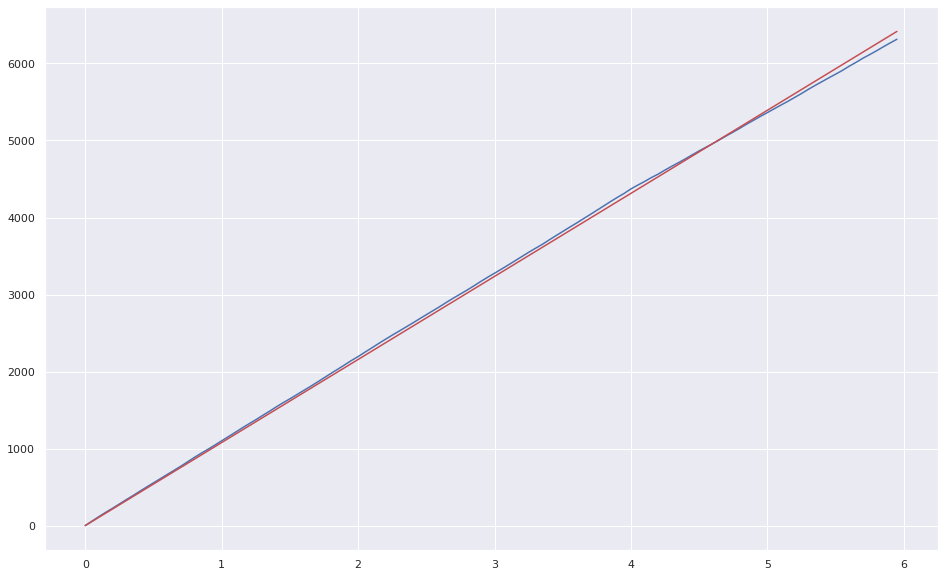

y = [1078.36350041] x + 0


In [88]:
y = df['GlobalMSD']
x = df['time']
# We only need a*x. so to figure out a we use lstsq from numpy
# Our x matrix is one dimensional, it needs to be two dimensional to use lstsq so:
x = x[:,np.newaxis]
a, _, _, _ = np.linalg.lstsq(x, y)

plt.plot(x, y, 'b-')
plt.plot(x, a*x, 'r-')
plt.show()
print(f"y = {a} x + 0")